In [8]:
import numpy as np
import pandas as pd
# считываем датасет и определяем его размер
df = pd.read_csv('/content/Titanic.csv')
df.shape

(891, 12)

In [9]:
# определаем сколько значений null (пропущенных) в каждом столбце
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Большое количество пропущенных значений в столбцах cabin и age. Столбец cabin никак не влияет на выживаемость, от него можно будет избавиться. Пропущенные значения в столбце Age нужно будет заменить, так как он понадобиться.

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Построение диаграм

Импортируем нужные библиотеки

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

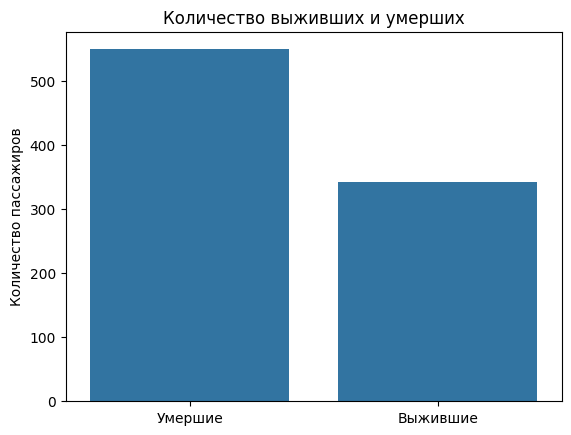

In [12]:
# Количество выживших и умерших пассажиров

# Строим столбчатую диаграмму
survival_counts = df['Survived'].value_counts()

sns.barplot(x=survival_counts.index, y=survival_counts.values)

# Добавляем название диаграммы, осей X и Y
plt.title('Количество выживших и умерших')
plt.xlabel('')
plt.ylabel('Количество пассажиров')

plt.xticks([0, 1], ['Умершие', 'Выжившие'])
plt.show()

Добавлю графики с общей информациейо количестве пассажиров разных полов, возростов и классов

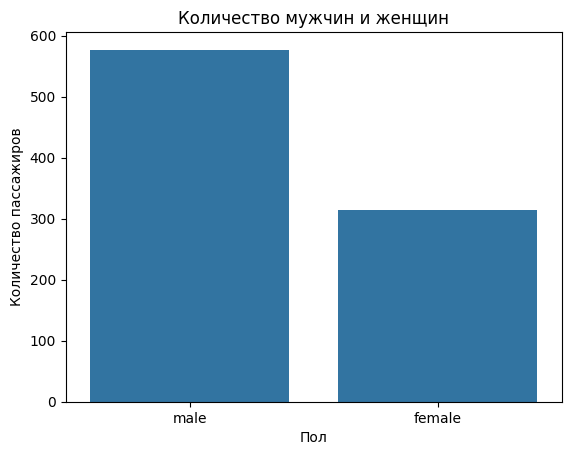

In [13]:
# Количество мужчин и женщин на корабле

# Строим столбчатую диаграмму
survival_counts = df['Sex'].value_counts()

sns.barplot(x=survival_counts.index, y=survival_counts.values)

# Добавляем название диаграммы, осей X и Y
plt.title('Количество мужчин и женщин')
plt.xlabel('Пол')
plt.ylabel('Количество пассажиров')

plt.show()

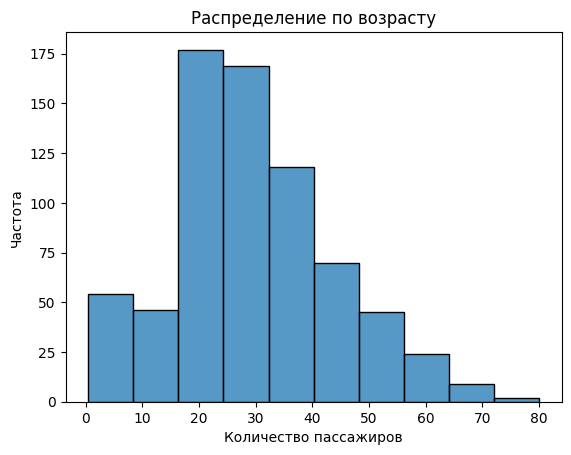

In [14]:
# Количество пассажиров по возрастам

# Строим столбчатую диаграмму
sns.histplot(df['Age'], bins=10)

# Добавляем название диаграммы, осей X и Y
plt.xlabel('Количество пассажиров')
plt.ylabel('Частота')
plt.title('Распределение по возрасту')
plt.show()

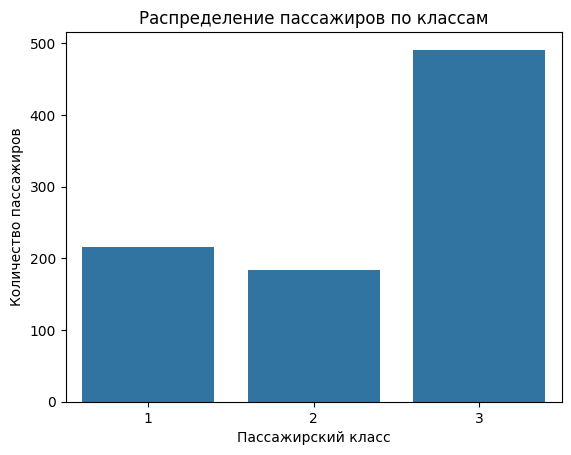

In [15]:
# Количество пассажиров в каждом классе

# Строим столбчатую диаграмму
survival_counts = df['Pclass'].value_counts()

sns.barplot(x=survival_counts.index, y=survival_counts.values)

# Добавляем название диаграммы, осей X и Y
plt.title('Распределение пассажиров по классам')
plt.xlabel('Пассажирский класс')
plt.ylabel('Количество пассажиров')

plt.show()

Добавлю графики с выживаемостью по группам выше(пол, возраст, пассажирский класс)

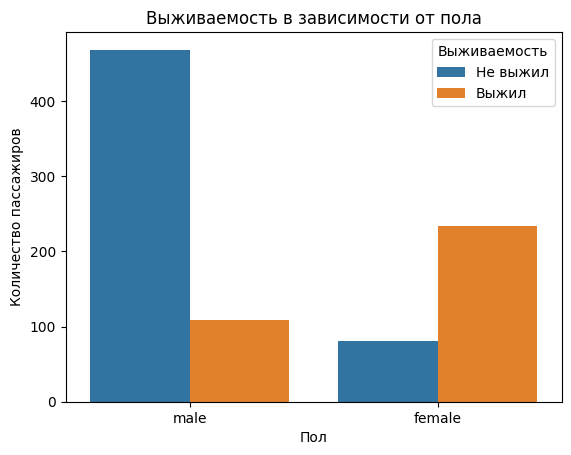

In [16]:
# Зависимость выживаемости от пола пассажира

# Строим столбчатую диаграмму по полу, разделяя на категории выжил/не выжил
sns.countplot(data=df, x='Sex', hue='Survived')

# Добавляем название диаграммы, осей X и Y
plt.title('Выживаемость в зависимости от пола')
plt.xlabel('Пол')
plt.ylabel('Количество пассажиров')

# Добавляем информацию в легенде диаграммы
plt.legend(title='Выживаемость', labels=['Не выжил', 'Выжил'])
plt.show()

Небольшой вывод по диаграмме: Количество женщин, которые выжили сильно превосходит, количество мужчин. В целом среди женщин большая часть выжила -> у женщин высокий шанс выжить

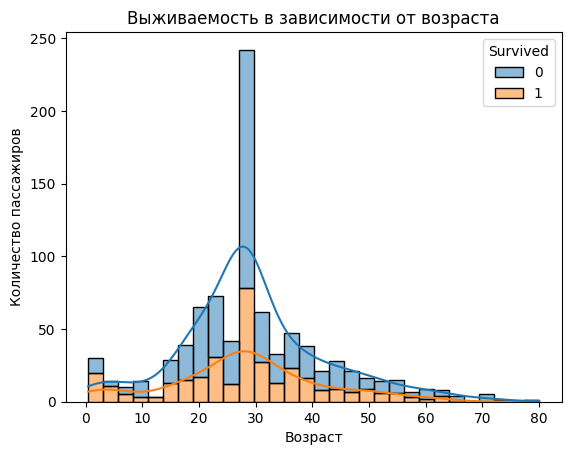

In [17]:
# Зависимость выживаемости от возраста пассажира

# Для этого графика сначала нужно заполнить пропущенные значения возраста. Заполню их медианными значениями
df['Age'] = df['Age'].fillna(df['Age'].median())

# Строим столбчатую диаграмму по возрасту, разделяя на категории выжил/не выжил, также указываем что категории накладываются друг на друга
# Добавляем график оценки плотности
sns.histplot(df, x='Age', hue='Survived', kde=True, multiple='stack')

# Добавляем название диаграммы, осей X и Y
plt.title('Выживаемость в зависимости от возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')

plt.show()

Небольшой вывод: по соотношения выживаемости, плохие показатели у пассажиров среднего возраста, не смотря на высокие показание выживших людей, умерших больше.

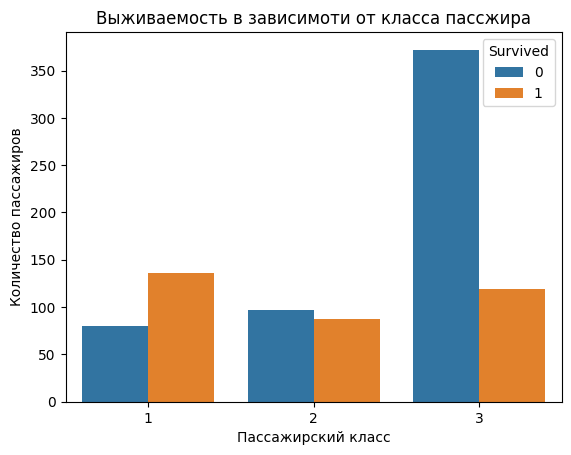

In [18]:
# Зависимость выживаемости от класса пассажира

# Строим столбчатую диаграмму по пассажирскому классу, разделяя на категории выжил/не выжил
sns.countplot(data=df, x='Pclass', hue='Survived')

# Добавляем название диаграммы, осей X и Y
plt.title('Выживаемость в зависимоти от класса пассжира')
plt.xlabel('Пассажирский класс')
plt.ylabel('Количество пассажиров')

# Добавляем информацию в легенде диаграммы
plt.show()

Небольшой вывод: самый высокий показатель выживаемости у пассажиров первого класса, также в этом классе выживших больше, чем погибших.

Проверим гипотезу: "размер семьи пассажира влияет на выживаемость".
Для этого понадобиться новое поле в датасете - размер семьи

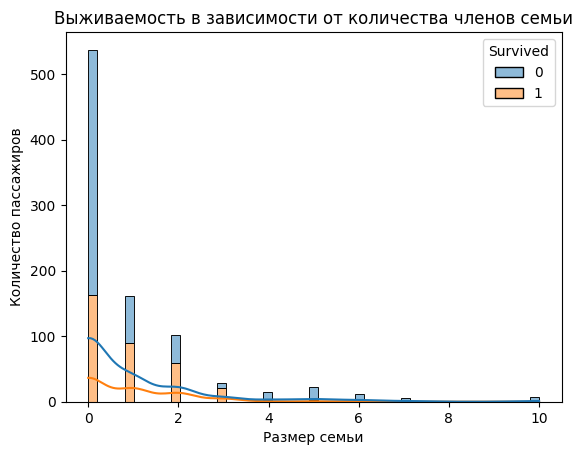

In [19]:
# Зависимость выживаемости от количества членов семьи

# Создание нового столбца: размер семьи
df['FamilySize'] = df['SibSp'] + df['Parch']

# Строим столбчатую диаграмму по размеру семьи, разделяя на категории выжил/не выжил, также указываем что категории накладываются друг на друга
# Добавляем график оценки плотности
sns.histplot(df, x='FamilySize', hue='Survived', kde=True, multiple='stack')

# Добавляем название диаграммы, осей X и Y
plt.title('Выживаемость в зависимости от количества членов семьи')
plt.xlabel('Размер семьи')
plt.ylabel('Количество пассажиров')

plt.show()

Небольшой вывод: количество одиноких людей, которое выжило больше всего, но по соотношению выживаемость лучше у пассажиров с небольшими семьями(2-3 человека)

In [ ]:
Присутпаем к преобразованию дата сета. Для начала нужно отбросить столбцы, которые никак не повлияют на выживаемость.

In [20]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'SibSp', 'Parch'])
df

,Survived,Pclass,Sex,Age,Fare,FamilySize
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,1
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,1
4,0,3,male,35.0,8.0500,0
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,0
887,1,1,female,19.0,30.0000,0
888,0,3,female,28.0,23.4500,3
889,1,1,male,26.0,30.0000,0


Далее преобразуем поле 'Sex' в числовые данные

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex']).astype('int64')
df

,Survived,Pclass,Sex,Age,Fare,FamilySize
0,0,3,1,22.0,7.2500,1
1,1,1,0,38.0,71.2833,1
2,1,3,0,26.0,7.9250,0
3,1,1,0,35.0,53.1000,1
4,0,3,1,35.0,8.0500,0
...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,0
887,1,1,0,19.0,30.0000,0
888,0,3,0,28.0,23.4500,3
889,1,1,1,26.0,30.0000,0


In [22]:
df.dtypes

,0
Survived,int64
Pclass,int64
Sex,int64
Age,float64
Fare,float64
FamilySize,int64


In [23]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
Fare,0
FamilySize,0


В переменную X записываем признаки, которые влияют на выживаемость. А в 'y' показатель выживаемости

In [24]:
X = df.drop(columns=['Survived'], axis=1)
y = df['Survived']

Обучение

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Nadam


# РАазделяем выборки на тестовую и обучающую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Производим стандартизацию
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.7))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5377 - loss: 0.7247 - val_accuracy: 0.7267 - val_loss: 0.6140
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6127 - loss: 0.6754 - val_accuracy: 0.7640 - val_loss: 0.5799
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6658 - loss: 0.6272 - val_accuracy: 0.7826 - val_loss: 0.5614
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6708 - loss: 0.6321 - val_accuracy: 0.8012 - val_loss: 0.5420
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6861 - loss: 0.6201 - val_accuracy: 0.7950 - val_loss: 0.5245
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6804 - loss: 0.5998 - val_accuracy: 0.8199 - val_loss: 0.5098
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7156 - loss: 0.5929 - val_accuracy: 0.8199 - val_loss: 0.4939
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7271 - loss: 0.5661 - val_accuracy: 0.8199 - val_loss

Строим графики точности и потерь по разультатам обучения

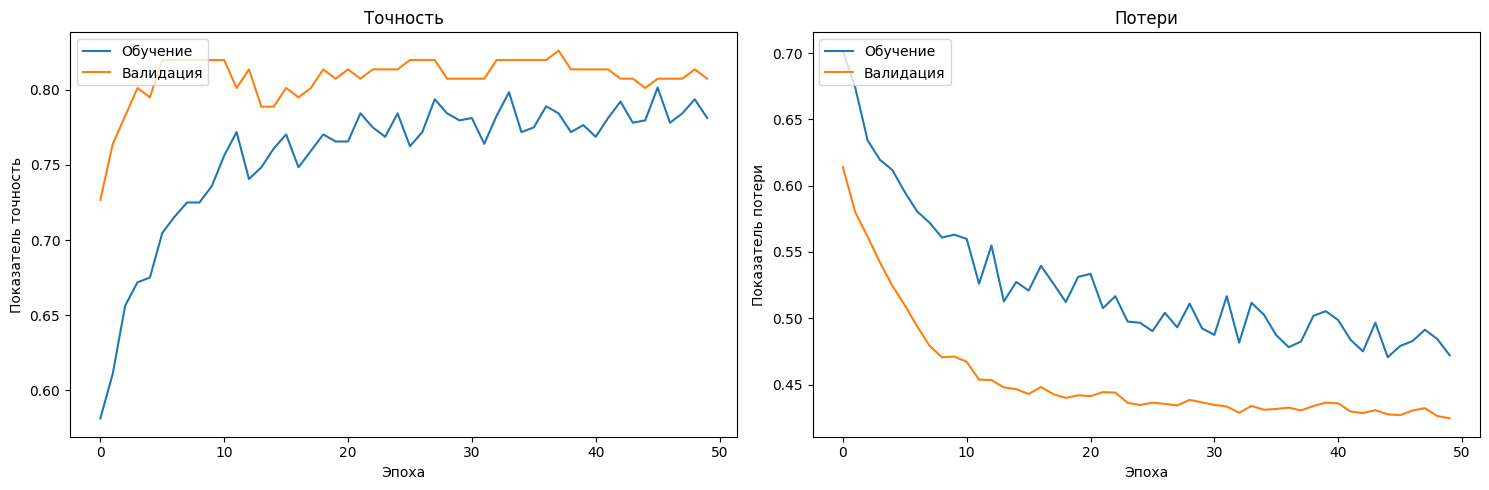

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# График точности
ax1.plot(history.history['accuracy'], label="Обучение")
ax1.plot(history.history['val_accuracy'], label="Валидация")
ax1.set_title("Точность")
ax1.set_xlabel("Эпоха")
ax1.set_ylabel("Показатель точность")
ax1.legend(loc="upper left")

# График потерь
ax2.plot(history.history['loss'], label="Обучение")
ax2.plot(history.history['val_loss'], label="Валидация")
ax2.set_title("Потери")
ax2.set_xlabel("Эпоха")
ax2.set_ylabel("Показатель потери")
ax2.legend(loc="upper left")

plt.tight_layout()
plt.show()

Кросс-валидация
Создание новой модели

In [28]:
df = pd.read_csv('/content/Titanic.csv')
le = LabelEncoder()

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Sex'] = le.fit_transform(df['Sex']).astype('int64')
df['FamilySize'] = df['SibSp'] + df['Parch']
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'SibSp', 'Parch'])
df

,Survived,Pclass,Sex,Age,Fare,FamilySize
0,0,3,1,22.0,7.2500,1
1,1,1,0,38.0,71.2833,1
2,1,3,0,26.0,7.9250,0
3,1,1,0,35.0,53.1000,1
4,0,3,1,35.0,8.0500,0
...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,0
887,1,1,0,19.0,30.0000,0
888,0,3,0,28.0,23.4500,3
889,1,1,1,26.0,30.0000,0


In [29]:
X = df.drop(columns=['Survived'], axis=1)
y = df['Survived']

In [42]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical


# РАазделяем выборки на тестовую и обучающую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create the neural network model
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.7))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model = KerasClassifier(model, epochs=50, batch_size=32, verbose=0)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_count = 1

for train_index, test_index in skf.split(X, y):
    # Разбиваем данные на обучающую и тестовую выборки для текущего фолда
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Обучаем модель на текущем фолде
    model.fit(X_train, y_train)

    # Прогнозируем на тестовом наборе и преобразуем предсказания в бинарные классы 0-1
    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    # Выводим отчет о классификации для текущего фолда
    print(f"Отчет о классификации для фолда {fold_count}:\n", classification_report(y_test, y_pred))

    # Вычисляем и выводим матрицу ошибок
    cm = confusion_matrix(y_test, y_pred)
    print(f"Матрица ошибок для фолда {fold_count}:\n", cm)

    # Извлекаем значения из матрицы ошибок
    tn, fp, fn, tp = cm.ravel() #извлекаем значения из матрицы ошибок
    print(f"Расшифровка для фолда {fold_count}:")
    print(f"True Negative: {tn}")
    print(f"False Positive: {fp}")
    print(f"False Negative: {fn}")
    print(f"True Positive: {tp}\n")

    fold_count += 1

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Отчет о классификации для фолда 1:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87       110
           1       0.84      0.70      0.76        69

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179

Матрица ошибок для фолда 1:
 [[101   9]
 [ 21  48]]
Расшифровка для фолда 1:
True Negative: 101
False Positive: 9
False Negative: 21
True Positive: 48

Отчет о классификации для фолда 2:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.78      0.69      0.73        68

    accuracy                           0.81       178
   macro avg       0.80      0.79      0.79       178
weighted avg       0.81      0.81      0.81       178

Матрица ошибок для фолда 2:
 [[97 13]
 [21 47]]
Расшифровка для фолда 2:
True Negative: 97
False Positive: 13
False Negati

Вывод: модель показывает стабильные результаты по всем фолдам с точностью 80–85%, демонстрируя высокую чувствительность к классу 0 (точность 0.82–0.84, полнота 0.88–0.93). Однако для класса 1 полнота варьируется (0.62–0.72), что указывает на наличие пропущенных положительных случаев.

Матрица ошибок показывает низкое количество ложных срабатываний для класса 0 (10–13), но значительное количество пропусков для класса 1 (среднее значение FN около 20).